In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [9]:
def create_mlp_model(input_shape): 
    model = models.Sequential()  
    input_layer = layers.Input((32, 32, 3))
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Flatten())  
    model.add(layers.Dense(200, activation="relu"))  
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(150, activation="relu")) 
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    return model


mlp_model = create_mlp_model((32, 32, 3))
mlp_model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
opt = optimizers.Adam(learning_rate=0.0005)
mlp_model.compile(loss="categorical_crossentropy", optimizer=opt,  metrics=["accuracy"])

In [15]:
validatedfit = mlp_model.fit(
    x_train, 
    y_train, 
    validation_split=0.2, 
    epochs=35,
    batch_size=64)

Epoch 1/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1403 - loss: 2.2676 - val_accuracy: 0.2394 - val_loss: 2.0534
Epoch 2/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1795 - loss: 2.1243 - val_accuracy: 0.2435 - val_loss: 2.0344
Epoch 3/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1867 - loss: 2.1001 - val_accuracy: 0.2387 - val_loss: 2.0241
Epoch 4/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1885 - loss: 2.0858 - val_accuracy: 0.2355 - val_loss: 2.0357
Epoch 5/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1890 - loss: 2.0805 - val_accuracy: 0.2518 - val_loss: 2.0146
Epoch 6/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1973 - loss: 2.0655 - val_accuracy: 0.2521 - val_loss: 2.0216
Epoch 7/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2029 - loss: 2.0676 - val_accuracy: 0.2439 - val_loss: 2.0169
Epoch 8/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2059 - loss: 2.0503 - val_accuracy: 0.

In [17]:
mlp_model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2927 - loss: 1.9704


[1.9710345268249512, 0.2906000018119812]

In [19]:
def create_cnn_model(input_shape):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    output_layer = layers.Dense(NUM_CLASSES)(x)  
    output_layer = layers.Activation("softmax")(output_layer)  

    model = models.Model(inputs=input_layer, outputs=output_layer) 
    return model

    
    output_layer = layers.Activation("softmax")(x)
cnn_model = create_cnn_model((32, 32, 3))
cnn_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [21]:
opt = optimizers.Adam(learning_rate=0.0005)
cnn_model.compile(loss="categorical_crossentropy", optimizer=opt,  metrics=["accuracy"])

In [23]:
validated_fit_cnn = cnn_model.fit(
    x_train, 
    y_train, 
    validation_split=0.2, 
    epochs=35,
    batch_size=64)

Epoch 1/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.3596 - loss: 1.8941 - val_accuracy: 0.5144 - val_loss: 1.3706
Epoch 2/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5399 - loss: 1.2834 - val_accuracy: 0.5597 - val_loss: 1.2469
Epoch 3/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6214 - loss: 1.0619 - val_accuracy: 0.6400 - val_loss: 1.0356
Epoch 4/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6659 - loss: 0.9509 - val_accuracy: 0.6330 - val_loss: 1.0382
Epoch 5/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6954 - loss: 0.8715 - val_accuracy: 0.6594 - val_loss: 0.9780
Epoch 6/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7175 - loss: 0.8116 - val_accuracy: 0.6835 - val_loss: 0.9070
Epoch 7/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7346 - loss: 0.7640 - val_accuracy: 0.6805 - val_loss: 0.9269
Epoch 8/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7529 - loss: 0.7090 - 

In [24]:
mlp_model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2927 - loss: 1.9704 


[1.9710345268249512, 0.2906000018119812]

In [25]:
cnn_model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6890 - loss: 1.3884


[1.396541953086853, 0.6868000030517578]

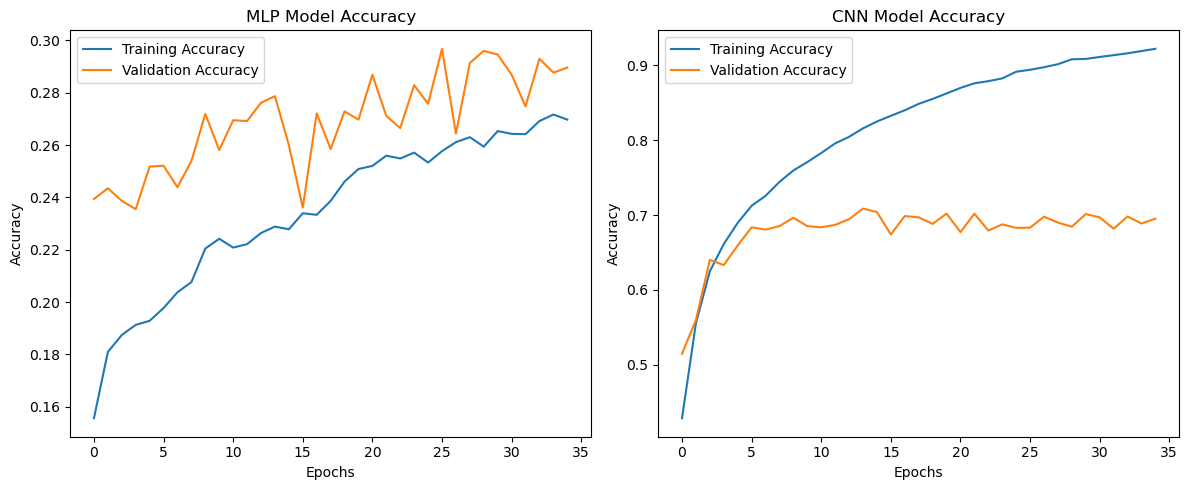

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for MLP model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(validatedfit.history['accuracy'], label='Training Accuracy')
plt.plot(validatedfit.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(validated_fit_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(validated_fit_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
